In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import confusion_matrix

In [2]:
# Load data
dir = '/mnt/data/2020_Projects/2021_HDP/03_Data/FBCcalc_normPathways/'

best_level_clinical_model_HDP = pd.read_csv(dir + 'best_level_clinical_model_HDP.csv')
best_level_clinical_model_CST = pd.read_csv(dir + 'best_level_clinical_model_CST.csv')
best_level_clinical_model_2 = pd.read_csv(dir + 'best_level_clinical_model_2.csv')
best_level_clinical_model_win = pd.read_csv(dir + 'best_level_clinical_model_window.csv')

best_contact_clinical_model_HDP = pd.read_csv(dir + 'best_contact_clinical_model_HDP.csv')
best_contact_clinical_model_CST = pd.read_csv(dir + 'best_contact_clinical_model_CST.csv')
best_contact_clinical_model_2 = pd.read_csv(dir + 'best_contact_clinical_model_2.csv')
best_contact_clinical_model_win = pd.read_csv(dir + 'best_contact_clinical_model_window.csv')

In [3]:
from sklearn.metrics import balanced_accuracy_score

def custom_perm(x, y, k, name, n_perm=100000, dir=dir):

    n_permutations = n_perm
    permute_stat = []

    for p in range(n_permutations):
        x_permuted = np.random.permutation(x)
        stat = balanced_accuracy_score(y,x_permuted)
        permute_stat.append(stat)

    model_stat = balanced_accuracy_score(y,x)
    p_value = 1 - np.sum(permute_stat < model_stat)/len(permute_stat) # upper tailed test
    #p_value = np.sum(permute_mse < model_mse)/len(permute_mse) # lower tailed test

    plt.rcParams["figure.figsize"] = (3,2)
    sns.histplot(permute_stat, kde=True, label='Population')
    plt.title(name, fontsize=14)
    plt.ylabel('Frequency')

    plt.axvline(x=model_stat, ymin=0, ymax=1, color='red', linestyle='--')

    #plt.savefig(dir + name + '.png', dpi=300, bbox_inches='tight')

    print(f'Model stat: {model_stat}')
    print(f'n permutations < Model stat = {np.sum(permute_stat < model_stat)}')
    print(f'p-value = {p_value:.3}')

    # Obtain confusion matrix, true postive rate (TPR) and true negative rate (TPN)
    tn, fp, fn, tp = confusion_matrix(y, x).ravel()
    print(f'(tn, fp, fn, tp): {tn, fp, fn, tp}')
    print(f'TPR: {tp/(tp+fn)}')
    print(f'TNR: {tn/(tn+fp)}')
    print(f'Balanced acc.: {((tp/(tp+fn))+(tn/(tn+fp)))/2}')

Model stat: 0.6295986622073578
n permutations < Model stat = 99801
p-value = 0.00199
(tn, fp, fn, tp): (61, 31, 21, 31)
TPR: 0.5961538461538461
TNR: 0.6630434782608695
Balanced acc.: 0.6295986622073578


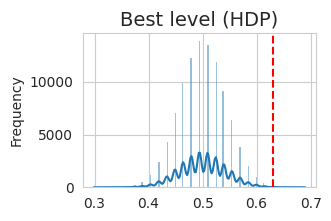

In [4]:
# Best level HDP
x = best_level_clinical_model_HDP.best_model.to_numpy()
y = best_level_clinical_model_HDP.best_clin.to_numpy()
k = best_level_clinical_model_HDP.LeadID.nunique()

custom_perm(x, y, k, 'Best level (HDP)')

In [5]:
df = best_level_clinical_model_HDP

x = len(df.loc[(df.best_clin == 1) & (df.best_model == 1)])
n = len(df.loc[df.best_clin == 1])
p = n / len(df)

stats.binom_test(x, n, p, alternative='greater')

/tmp/ipykernel_131702/2319116268.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x, n, p, alternative='greater')


0.0004736924833928262

In [6]:
# Best contact HDP
x = best_contact_clinical_model_HDP.best_model.to_numpy()
y = best_contact_clinical_model_HDP.best_clin.to_numpy()
k = best_contact_clinical_model_HDP.LeadID.nunique()

custom_perm(x, y, k, 'Best contact (HDP)')

Model stat: 0.5277301315037164
n permutations < Model stat = 70098
p-value = 0.299
(tn, fp, fn, tp): (110, 49, 28, 16)
TPR: 0.36363636363636365
TNR: 0.6918238993710691
Balanced acc.: 0.5277301315037164


In [7]:
df = best_contact_clinical_model_HDP

x = len(df.loc[(df.best_clin == 1) & (df.best_model == 1)])
n = len(df.loc[df.best_clin == 1])
p = n / len(df)

stats.binom_test(x, n, p, alternative='greater')

/tmp/ipykernel_131702/1247464318.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x, n, p, alternative='greater')


0.018534686030280714

In [8]:
# Best level 2
x = best_level_clinical_model_2.best_model.to_numpy()
y = best_level_clinical_model_2.best_clin.to_numpy()
k = best_level_clinical_model_2.LeadID.nunique()

custom_perm(x, y, k, 'Best level (HDP & CST)')

Model stat: 0.6295986622073578
n permutations < Model stat = 99782
p-value = 0.00218
(tn, fp, fn, tp): (61, 31, 21, 31)
TPR: 0.5961538461538461
TNR: 0.6630434782608695
Balanced acc.: 0.6295986622073578


In [9]:
df = best_level_clinical_model_2

x = len(df.loc[(df.best_clin == 1) & (df.best_model == 1)])
n = len(df.loc[df.best_clin == 1])
p = n / len(df)

stats.binom_test(x, n, p, alternative='greater')

/tmp/ipykernel_131702/766352454.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x, n, p, alternative='greater')


0.0004736924833928262

In [10]:
# Best contact 2
x = best_contact_clinical_model_2.best_model.to_numpy()
y = best_contact_clinical_model_2.best_clin.to_numpy()
k = best_contact_clinical_model_2.LeadID.nunique()

custom_perm(x, y, k, 'Best contact (HDP & CST)')

Model stat: 0.5267548906789413
n permutations < Model stat = 69160
p-value = 0.308
(tn, fp, fn, tp): (109, 49, 28, 16)
TPR: 0.36363636363636365
TNR: 0.689873417721519
Balanced acc.: 0.5267548906789413


In [11]:
df = best_contact_clinical_model_2

x = len(df.loc[(df.best_clin == 1) & (df.best_model == 1)])
n = len(df.loc[df.best_clin == 1])
p = n / len(df)

stats.binom_test(x, n, p, alternative='greater')

/tmp/ipykernel_131702/682907636.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x, n, p, alternative='greater')


0.01938765301483609

In [12]:
df.loc[(df.best_clin == 1) & (df.best_model == 1)]
len(df.loc[df.best_clin == 1])

44

In [13]:
# Best level CST
x = best_level_clinical_model_CST.best_model.to_numpy()
y = best_level_clinical_model_CST.best_clin.to_numpy()
k = best_level_clinical_model_CST.LeadID.nunique()

custom_perm(x, y, k, 'Worst level (CST)')

Model stat: 0.6413690476190477
n permutations < Model stat = 100000
p-value = 0.0
(tn, fp, fn, tp): (111, 1, 34, 14)
TPR: 0.2916666666666667
TNR: 0.9910714285714286
Balanced acc.: 0.6413690476190477


In [14]:
df = best_level_clinical_model_CST

x = len(df.loc[(df.best_clin == 1) & (df.best_model == 1)])
n = len(df.loc[df.best_clin == 1])
p = n / len(df)

stats.binom_test(x, n, p=p, alternative='greater')

/tmp/ipykernel_131702/2115262554.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x, n, p=p, alternative='greater')


0.6038549827880533

Model stat: 0.5634796238244515
n permutations < Model stat = 99553
p-value = 0.00447
(tn, fp, fn, tp): (147, 7, 48, 10)
TPR: 0.1724137931034483
TNR: 0.9545454545454546
Balanced acc.: 0.5634796238244515


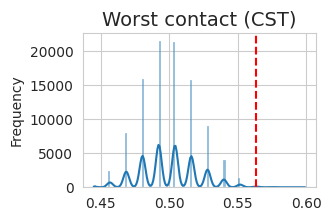

In [15]:
# Best contact CST
x = best_contact_clinical_model_CST.best_model.to_numpy()
y = best_contact_clinical_model_CST.best_clin.to_numpy()
k = best_contact_clinical_model_CST.LeadID.nunique()

custom_perm(x, y, k, 'Worst contact (CST)')

In [16]:
df = best_contact_clinical_model_CST

x = len(df.loc[(df.best_clin == 1) & (df.best_model == 1)])
n = len(df.loc[df.best_clin == 1])
p = n / len(df)

stats.binom_test(x, n, p=p, alternative='greater')

/tmp/ipykernel_131702/2828415216.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x, n, p=p, alternative='greater')


0.9743774228317982

Model stat: 0.6934643618280842
n permutations < Model stat = 99998
p-value = 2e-05
(tn, fp, fn, tp): (70, 33, 12, 29)
TPR: 0.7073170731707317
TNR: 0.6796116504854369
Balanced acc.: 0.6934643618280842


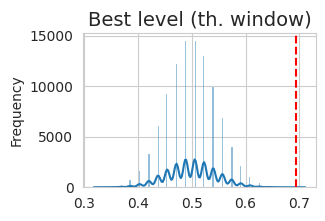

In [17]:
# Best level window
x = best_level_clinical_model_win.best_model.to_numpy()
y = best_level_clinical_model_win.best_clin.to_numpy()
k = best_level_clinical_model_win.LeadID.nunique()

custom_perm(x, y, k, 'Best level (th. window)')

In [18]:
df = best_level_clinical_model_win

x = len(df.loc[(df.best_clin == 1) & (df.best_model == 1)])
n = len(df.loc[df.best_clin == 1])
p = n / len(df)

stats.binom_test(x, n, p=p, alternative='greater')

/tmp/ipykernel_131702/4242483203.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x, n, p=p, alternative='greater')


2.5300616937543595e-08

Model stat: 0.6013099219620959
n permutations < Model stat = 99102
p-value = 0.00898
(tn, fp, fn, tp): (113, 43, 24, 22)
TPR: 0.4782608695652174
TNR: 0.7243589743589743
Balanced acc.: 0.6013099219620959


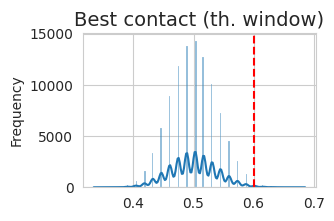

In [19]:
# Best contact window
x = best_contact_clinical_model_win.best_model.to_numpy()
y = best_contact_clinical_model_win.best_clin.to_numpy()
k = best_contact_clinical_model_win.LeadID.nunique()

custom_perm(x, y, k, 'Best contact (th. window)')

In [20]:
df = best_contact_clinical_model_win

x = len(df.loc[(df.best_clin == 1) & (df.best_model == 1)])
n = len(df.loc[df.best_clin == 1])
p = n / len(df)

stats.binom_test(x, n, p=p, alternative='greater')

/tmp/ipykernel_131702/921015544.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x, n, p=p, alternative='greater')


0.00016600398424568324